In [2]:
import pandas as pd
from pandas import Series,DataFrame

In [3]:
titanic_df=pd.read_csv('train.csv')

In [4]:
#embarkment:C-chersberg,Q-queensland,S-south hampten(where they came from).SibSp means the if they had sibling on board.Par
#par means if they had parents or children on board.
titanic_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#sibsp means siblings,parent on board if yes or no,embarked is the city they were going to 
titanic_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

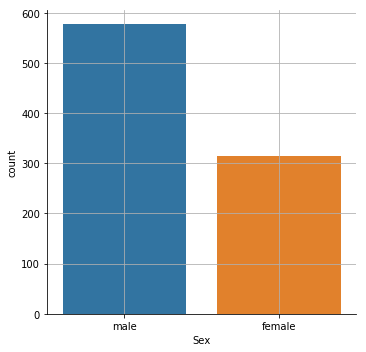

In [16]:
#QUES 1]:HOW MANY PASSENGERS ARE THERE AND DISTRIBUTION?
#there were half the no of female compared to male
sns.factorplot(x='Sex',data=titanic_df,kind='count')
plt.grid(True)

In [41]:
titanic_df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

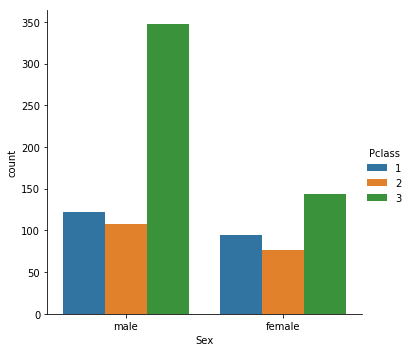

In [20]:
sns.factorplot('Sex',data=titanic_df,hue='Pclass',kind='count')

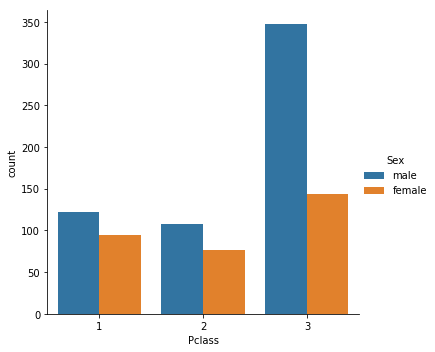

In [22]:
#most of them in 3 class were male.
sns.factorplot('Pclass',data=titanic_df,hue='Sex',kind='count')

In [19]:
#creating new col to indicate whether male or female is child. passenger is var created to which age and sex is passed 
def male_female_child(passenger):
    age,sex=passenger
    
    if age<16:
        return 'child'
    else:
        return sex

In [20]:
#format:(using apply method)
#titanic_df[new col name]=titanic_df[[col value passed to it]].apply( func name,axis=1(bcoz col axis))

titanic_df['Person']=titanic_df[['Age','Sex']].apply( male_female_child,axis=1)

In [21]:
#alone and survivvor are made later in the program
titanic_df[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Alone,Survivor,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,With Family,No,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,With Family,Yes,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Alone,Yes,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,With Family,Yes,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Alone,No,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Alone,No,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Alone,No,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,With Family,No,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,With Family,Yes,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,With Family,Yes,child


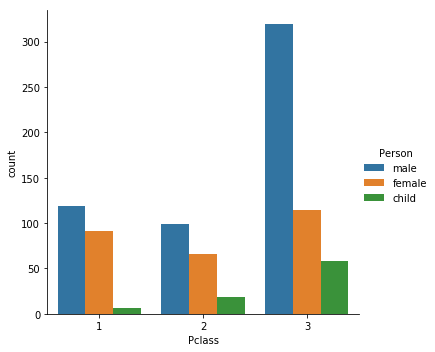

In [35]:
#making data more informative as we know now more children in 3 class were present
sns.factorplot('Pclass',data=titanic_df,hue='Person',kind='count')

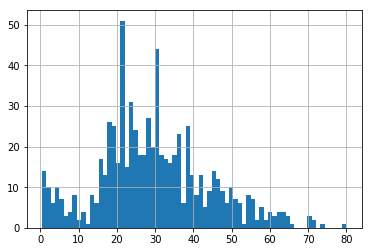

In [37]:
titanic_df['Age'].hist(bins=70)

In [38]:
titanic_df['Age'].mean()

29.69911764705882

In [42]:
titanic_df['Age'].max()

80.0

In [43]:
titanic_df['Age'].min()

0.42

In [40]:
#comparison of male, female, child
titanic_df['Person'].value_counts()

male      537
female    271
child      83
Name: Person, dtype: int64

In [44]:
del titanic_df['person']

In [45]:
titanic_df[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


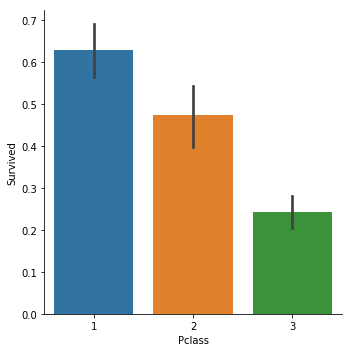

In [48]:
f=sns.factorplot('Pclass','Survived',data=titanic_df,kind='bar')

In [52]:
titanic_df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

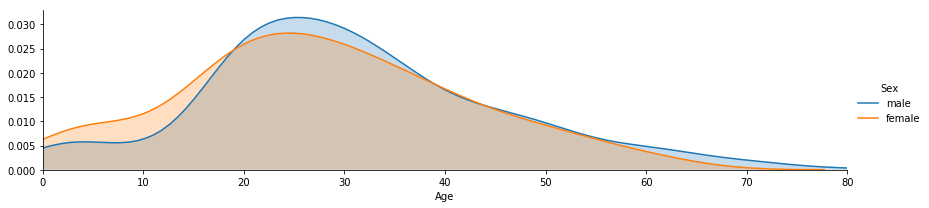

In [53]:
fig=sns.FacetGrid(titanic_df,hue='Sex',aspect=4)

fig.map(sns.kdeplot,'Age',shade=True)

oldest=titanic_df['Age'].max()

fig.set(xlim=(0,oldest))
fig.add_legend()

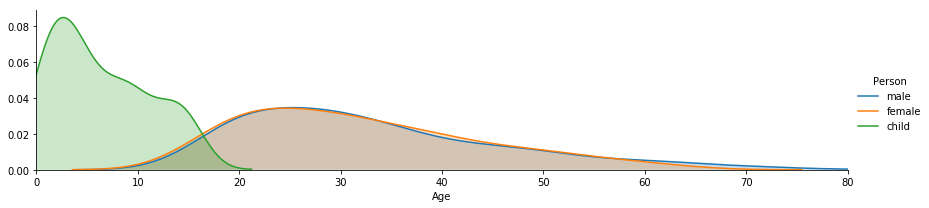

In [54]:
fig=sns.FacetGrid(titanic_df,hue='Person',aspect=4)

fig.map(sns.kdeplot,'Age',shade=True)

oldest=titanic_df['Age'].max()

fig.set(xlim=(0,oldest))
fig.add_legend()

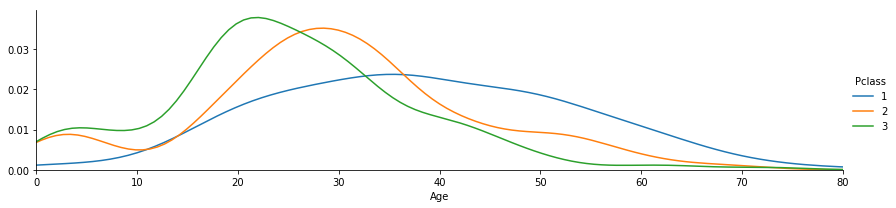

In [60]:
#relation of the pclass with the age graphically
fig=sns.FacetGrid(titanic_df,hue='Pclass',aspect=4)

fig.map(sns.kdeplot,'Age')

oldest=titanic_df['Age'].max()

fig.set(xlim=(0,oldest))
fig.add_legend()

In [54]:
#dropping the na entries of the cabin column and plotting the graph 
deck= titanic_df['Cabin'].dropna()

In [55]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

In [56]:
levels=[]
for level in deck:
    levels.append(level[0])
    
cabin_df=DataFrame(levels,columns=['Cabin'])
cabin_df.head()

,Cabin
0,C
1,C
2,E
3,G
4,C


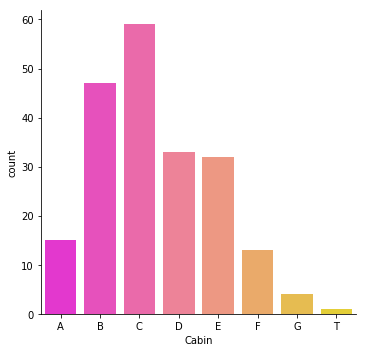

In [37]:
sns.factorplot('Cabin',data=cabin_df,palette='spring',kind='count',order=['A','B','C','D','E','F','G','T'])

In [38]:
cabin_df['Cabin'].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin, dtype: int64

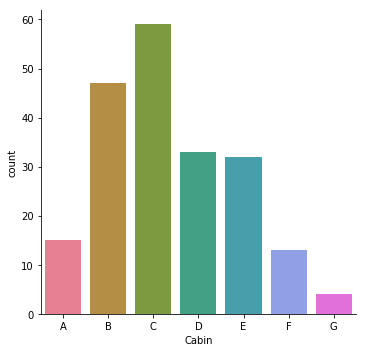

In [39]:
cabin_df1=cabin_df[cabin_df.Cabin != 'T']

sns.factorplot('Cabin',data=cabin_df,palette='husl',kind='count',order=['A','B','C','D','E','F','G'])

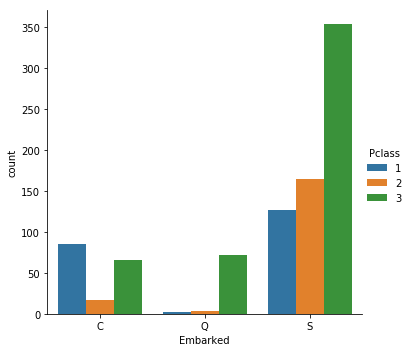

In [40]:
#all the people from queensland are from 3 class meaning economically weak
sns.factorplot('Embarked',data=titanic_df,hue='Pclass',kind='count',order=['C','Q','S'])

In [41]:
#QUES:WHO WAS ALONE AND WHO WAS WITH FAMILY? IF Parch && SibSp==0 they were alone.

#If series has 0 then the person was alone else with family

titanic_df['Alone'] = titanic_df.SibSp + titanic_df.Parch
titanic_df['Alone']

0       1
1       1
2       0
3       1
4       0
5       0
6       0
7       4
8       2
9       1
10      2
11      0
12      0
13      6
14      0
15      0
16      5
17      0
18      1
19      0
20      0
21      0
22      0
23      0
24      4
25      6
26      0
27      5
28      0
29      0
       ..
861     1
862     0
863    10
864     0
865     0
866     1
867     0
868     0
869     2
870     0
871     2
872     0
873     0
874     1
875     0
876     0
877     0
878     0
879     1
880     1
881     0
882     0
883     0
884     0
885     5
886     0
887     0
888     3
889     0
890     0
Name: Alone, Length: 891, dtype: int64

In [42]:
#in the titanic df where the loc in alone col were 0:
titanic_df['Alone'].loc[titanic_df['Alone'] >0]= 'With Family'

titanic_df['Alone'].loc[titanic_df['Alone'] == 0]= 'Alone'


In [43]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Alone,Survivor,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,With Family,No,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,With Family,Yes,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Alone,Yes,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,With Family,Yes,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Alone,No,male


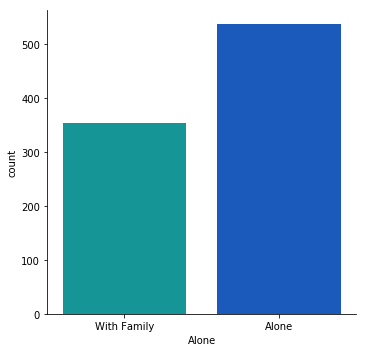

In [44]:
sns.factorplot('Alone',data=titanic_df,kind='count',palette='winter_r')

In [45]:
titanic_df['Alone'].value_counts()

Alone          537
With Family    354
Name: Alone, dtype: int64

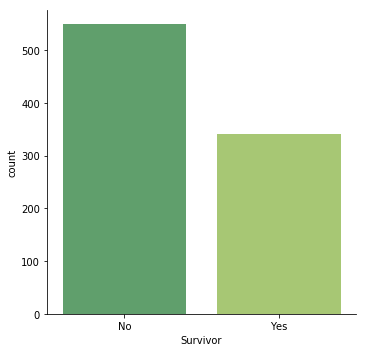

In [46]:
#QUES:WHAT FACTOR SAVED ONE TO SURVIVE THE CRASH:

titanic_df['Survivor']=titanic_df.Survived.map({0:'No',1:'Yes'})
sns.factorplot('Survivor',data=titanic_df,palette='summer',kind='count')

In [47]:
titanic_df['Survivor'].value_counts()

No     549
Yes    342
Name: Survivor, dtype: int64

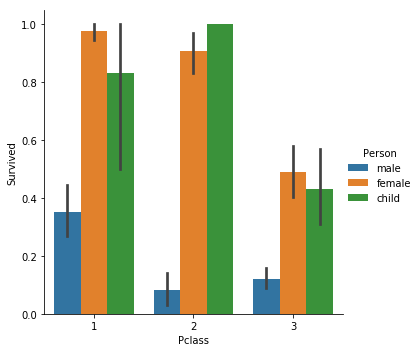

In [48]:
sns.factorplot('Pclass','Survived',hue='Person',data=titanic_df,kind='bar')

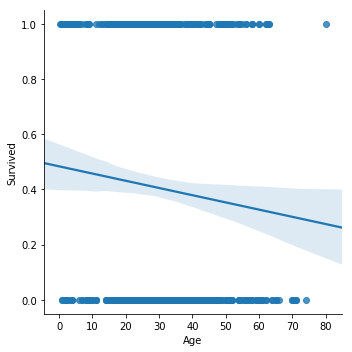

In [49]:
#older the passenger less likely that he survived
sns.lmplot('Age','Survived',data=titanic_df)

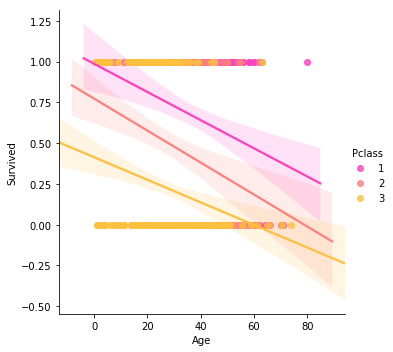

In [50]:
sns.lmplot('Age','Survived',hue='Pclass',data=titanic_df,palette='spring')

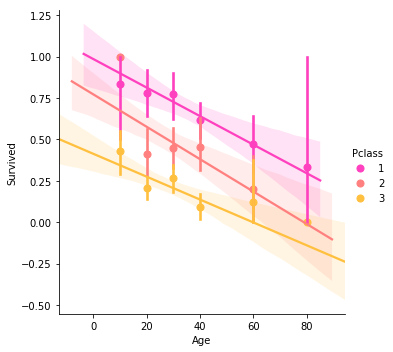

In [51]:
generations=[10,20,30,40,60,80]

sns.lmplot('Age','Survived',hue='Pclass',data=titanic_df,palette='spring',x_bins=generations)

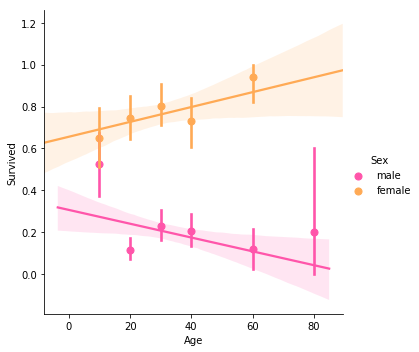

In [52]:
#if u were older female u had better chances of surviving than male
sns.lmplot('Age','Survived',hue='Sex',data=titanic_df,palette='spring',x_bins=generations)

In [59]:
titanic_df['Cabin']=cabin_df['Cabin']

In [60]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Alone,Survivor,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C,S,With Family,No,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,With Family,Yes,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,E,S,Alone,Yes,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,G,S,With Family,Yes,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,C,S,Alone,No,male


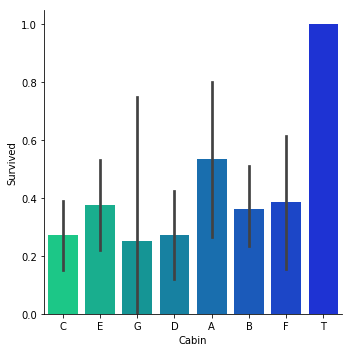

In [66]:
sns.factorplot('Cabin','Survived',data=titanic_df,palette='winter_r',kind='bar')

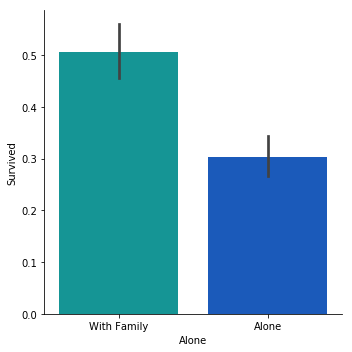

In [67]:
#more no of people with family survived than alone
sns.factorplot('Alone','Survived',data=titanic_df,palette='winter_r',kind='bar')

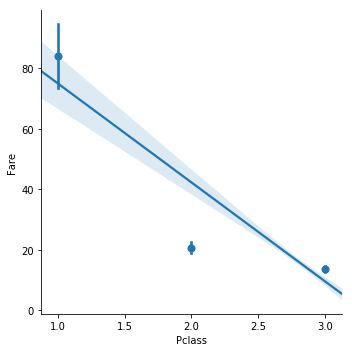

In [77]:
m=[1,2,3]

fig=sns.lmplot('Pclass','Fare',data=titanic_df,palette='winter_r',x_bins=m)